<a href="https://colab.research.google.com/github/anvesh-lp/BruteForce/blob/main/DataModelingforNFLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('NFLX.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-17,587.849976,590.280029,580.849976,589.349976,589.349976,4145100
1,2021-09-20,586.789978,591.530029,568.080017,575.429993,575.429993,3732200
2,2021-09-21,578.309998,581.880005,569.369995,573.140015,573.140015,2250900
3,2021-09-22,579.690002,595.650024,579.690002,590.650024,590.650024,4021800
4,2021-09-23,590.789978,599.320007,589.130005,593.260010,593.260010,2526200


In [4]:
dataset['Data'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(252, 8)

In [6]:
dataset.drop('Adj Close', axis = 1, inplace = True)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Data
0,2021-09-17,587.849976,590.280029,580.849976,589.349976,4145100,2021-09-17
1,2021-09-20,586.789978,591.530029,568.080017,575.429993,3732200,2021-09-20
2,2021-09-21,578.309998,581.880005,569.369995,573.140015,2250900,2021-09-21
3,2021-09-22,579.690002,595.650024,579.690002,590.650024,4021800,2021-09-22
4,2021-09-23,590.789978,599.320007,589.130005,593.260010,2526200,2021-09-23


In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Data      0
dtype: int64

In [9]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
Data      False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    object        
 1   Open    252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Close   252 non-null    float64       
 5   Volume  252 non-null    int64         
 6   Data    252 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 13.9+ KB


In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,390.388135,396.713392,382.932024,389.717341,8.527000e+06
std,183.815444,184.591228,181.901169,182.930770,1.095387e+07
min,163.960007,172.059998,162.710007,166.369995,1.287200e+06
25%,219.030006,226.010002,211.610000,218.197502,3.887075e+06
50%,373.849991,380.574997,363.690002,369.875000,5.858200e+06
75%,597.699982,603.582504,588.040009,597.524994,9.112375e+06
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08


In [12]:
print(len(dataset))

252


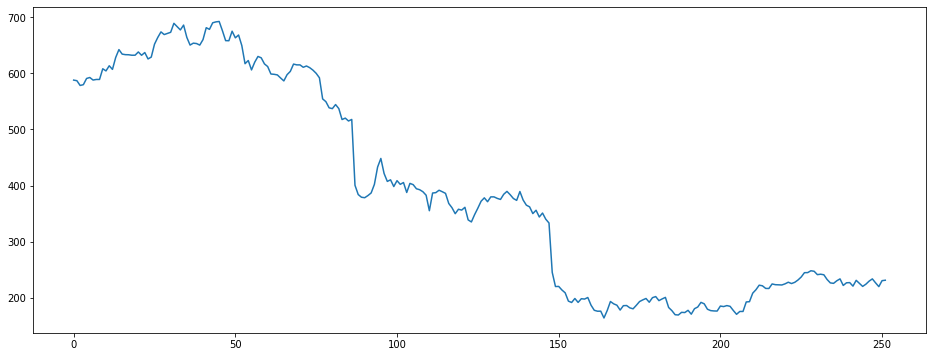

In [13]:
dataset['Open'].plot(figsize=(16,6))

In [14]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train.shape

(189, 4)

In [17]:
X_test.shape

(63, 4)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print(regressor.coef_)

[-6.25016690e-01  7.74606027e-01  8.53234940e-01  9.40907581e-08]


In [21]:
print(regressor.intercept_)

-1.1030411194223007


In [22]:
predicted=regressor.predict(X_test)

In [23]:
print(X_test)

           Open        High         Low    Volume
158  197.649994  204.380005  191.009995  12218800
83   517.599976  538.369995  511.880005   7861100
170  185.869995  190.190002  179.770004  10429400
101  402.100006  408.000000  396.359985   8452900
150  220.179993  226.270004  210.050003  37515100
..          ...         ...         ...       ...
221  227.679993  232.070007  225.050003   7142700
15   634.169983  643.799988  630.859985   3272100
152  208.800003  209.149994  198.279999  20318100
74   605.609985  609.989990  590.559998   3067500
7    589.000000  599.539978  580.159973   4431100

[63 rows x 4 columns]


In [24]:
predicted.shape

(63,)

In [25]:
dframe=pd.DataFrame(y_test,predicted)

In [26]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [27]:
print(dfr)

     Actual Price  Predicted Price
158    204.009995       197.802475
83     525.690002       529.906540
170    186.350006       184.414790
101    406.269989       402.600531
150    215.520004       219.302723
..            ...              ...
221    229.910004       229.048577
15     632.659973       639.801142
152    198.399994       201.493487
74     597.369995       597.057581
7      583.849976       590.599094

[63 rows x 2 columns]


In [28]:
dfr.head(25)

,Actual Price,Predicted Price
158,204.009995,197.802475
83,525.690002,529.906540
170,186.350006,184.414790
101,406.269989,402.600531
150,215.520004,219.302723
199,185.880005,180.760462
118,341.760010,349.517675
227,249.300003,247.639474
63,591.059998,594.659382
135,374.589996,375.761654


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
regressor.score(X_test,y_test)

0.9995481668320692

In [31]:
import math

In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.026439592947956


In [33]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 14.653571143809746


In [34]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 3.8279983207689297


In [35]:
graph=dfr.head(20)

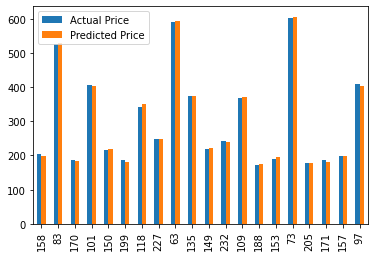

In [36]:
graph.plot(kind='bar')